In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import acquire as ac

import warnings
warnings.filterwarnings("ignore")

---
# Prepare

In [2]:
df = ac.get_telco_data()
print(df.shape)
df.head()

(7043, 23)


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,internet_service_type,...,tech_support,streaming_tv,streaming_movies,contract_type_id,contract_type,paperless_billing,payment_type_id,payment_type,monthly_charges,churn
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,DSL,...,No,No,Yes,1,Month-to-month,No,2,Mailed check,59.9,No
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,DSL,...,Yes,Yes,Yes,1,Month-to-month,Yes,4,Credit card (automatic),69.4,No
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,DSL,...,No,No,No,1,Month-to-month,Yes,1,Electronic check,48.2,No
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,DSL,...,No,No,No,1,Month-to-month,Yes,1,Electronic check,25.1,Yes
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,DSL,...,No,No,No,1,Month-to-month,No,3,Bank transfer (automatic),30.5,Yes


In [3]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
internet_service_type       7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
contract_type               7043 non-null object
paperless_billi

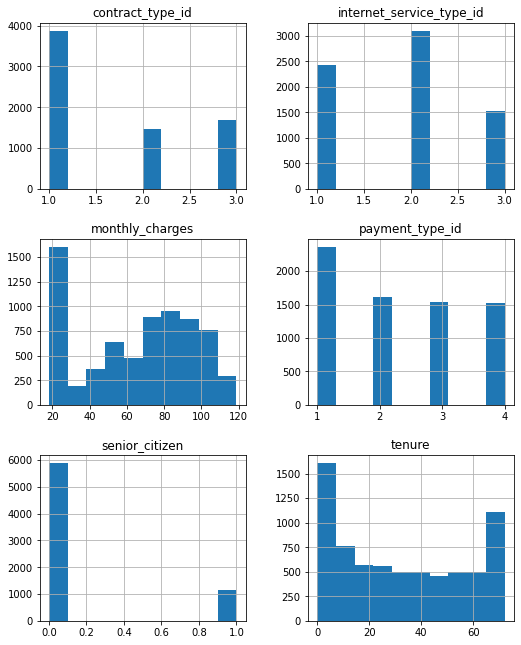

In [5]:
df.hist(figsize=(8.5, 11))
plt.show()

In [6]:
df.drop(columns=["customer_id", "gender", "partner", "dependents"], inplace=True)
df

,senior_citizen,tenure,phone_service,multiple_lines,internet_service_type_id,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,contract_type,paperless_billing,payment_type_id,payment_type,monthly_charges,churn
0,0,9,Yes,Yes,1,DSL,No,No,No,No,No,Yes,1,Month-to-month,No,2,Mailed check,59.90,No
1,0,9,Yes,No,1,DSL,No,No,No,Yes,Yes,Yes,1,Month-to-month,Yes,4,Credit card (automatic),69.40,No
2,1,7,Yes,No,1,DSL,Yes,No,No,No,No,No,1,Month-to-month,Yes,1,Electronic check,48.20,No
3,1,1,No,No phone service,1,DSL,No,No,No,No,No,No,1,Month-to-month,Yes,1,Electronic check,25.10,Yes
4,0,1,No,No phone service,1,DSL,Yes,No,No,No,No,No,1,Month-to-month,No,3,Bank transfer (automatic),30.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,28,Yes,No,3,None,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,Two year,Yes,4,Credit card (automatic),20.30,No
7039,0,63,Yes,Yes,3,None,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,Two year,No,2,Mailed check,25.25,No
7040,0,71,Yes,Yes,3,None,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,Two year,Yes,4,Credit card (automatic),24.40,No
7041,0,67,Yes,No,3,None,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,Two year,Yes,3,Bank transfer (automatic),19.25,No


In [7]:
df[df.tenure != 0]

,senior_citizen,tenure,phone_service,multiple_lines,internet_service_type_id,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,contract_type,paperless_billing,payment_type_id,payment_type,monthly_charges,churn
0,0,9,Yes,Yes,1,DSL,No,No,No,No,No,Yes,1,Month-to-month,No,2,Mailed check,59.90,No
1,0,9,Yes,No,1,DSL,No,No,No,Yes,Yes,Yes,1,Month-to-month,Yes,4,Credit card (automatic),69.40,No
2,1,7,Yes,No,1,DSL,Yes,No,No,No,No,No,1,Month-to-month,Yes,1,Electronic check,48.20,No
3,1,1,No,No phone service,1,DSL,No,No,No,No,No,No,1,Month-to-month,Yes,1,Electronic check,25.10,Yes
4,0,1,No,No phone service,1,DSL,Yes,No,No,No,No,No,1,Month-to-month,No,3,Bank transfer (automatic),30.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,28,Yes,No,3,None,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,Two year,Yes,4,Credit card (automatic),20.30,No
7039,0,63,Yes,Yes,3,None,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,Two year,No,2,Mailed check,25.25,No
7040,0,71,Yes,Yes,3,None,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,Two year,Yes,4,Credit card (automatic),24.40,No
7041,0,67,Yes,No,3,None,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,Two year,Yes,3,Bank transfer (automatic),19.25,No
